# Temp

Temporary file for testing new functions.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 10)
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
plt.rcParams['figure.figsize'] = [12, 4]

# Pytorch 

In [3]:
import torch

In [4]:
# Simple example: y = (x1 - 2)^2 + (x2 - 5)^2
x = np.random.randn(2, 1)
x

array([[-1.47526494],
       [ 0.23848053]])

In [5]:
x = torch.from_numpy(x)
x

tensor([[-1.4753],
        [ 0.2385]], dtype=torch.float64)

In [6]:
x.requires_grad = True

In [7]:
y = (x[0] - 2)**2 + (x[1] - 5)**2

In [8]:
y.backward()

In [9]:
x.grad

tensor([[-6.9505],
        [-9.5230]], dtype=torch.float64)

In [10]:
print(2*(-0.77451728 - 2))
print(2 * (-0.64667186 - 3))

-5.54903456
-7.29334372


In [11]:
lr = 0.1
x.data.sub_(lr * x.grad)  # With '_', modifies in place.

tensor([[-0.7802],
        [ 1.1908]], dtype=torch.float64)

In [12]:
x.grad

tensor([[-6.9505],
        [-9.5230]], dtype=torch.float64)

In [13]:
x.grad.zero_()

tensor([[ 0.],
        [ 0.]], dtype=torch.float64)

In [14]:
x.grad

tensor([[ 0.],
        [ 0.]], dtype=torch.float64)

## Gradient Descent 

In [15]:
# Gradient descent
lr = 0.1
steps = 30

def loss(x1, x2):
    return (x1 - 2)**2 + (x2 - 5)**2

x = torch.tensor(np.array([5., -4.]), requires_grad=True)
results = {'x1': [x.detach().numpy()[0]], 'x2': [x.detach().numpy()[1]],
           'loss': [loss(x.detach().numpy()[0], x.detach().numpy()[1])]}

for i in range(steps):
    y = loss(x[0], x[1])
    y.backward()
    x.data.sub_(lr * x.grad)  # With '_', modifies in place.
    x.grad.zero_()
    results['x1'].append(x.detach().numpy()[0])
    results['x2'].append(x.detach().numpy()[1])
    results['loss'].append(y.detach().numpy())


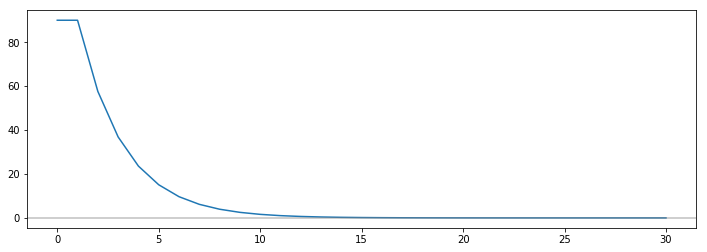

In [16]:
res_df = DataFrame.from_dict(results)
plt.plot(res_df.loss)
plt.axhline(y=0, c='grey', alpha=0.5)
plt.show()

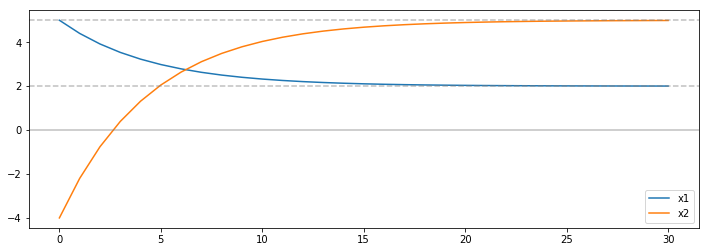

In [17]:
res_df.plot()
plt.axhline(y=2, c='grey', ls='dashed', alpha=0.5)
plt.axhline(y=5, c='grey', ls='dashed', alpha=0.5)
plt.axhline(y=0, c='grey', alpha=0.5)
plt.show()

In [18]:
res_df

,x1,x2,loss
0,5.000000,-4.000000,90
1,4.400000,-2.200000,90.0
2,3.920000,-0.760000,57.60000000000001
3,3.536000,0.392000,36.864
4,3.228800,1.313600,23.592960000000005
...,...,...,...
26,2.009067,4.972799,0.0012845229234353854
27,2.007254,4.978239,0.0008220946709986565
28,2.005803,4.982591,0.0005261405894391414
29,2.004642,4.986073,0.0003367299772410381


## Gradient Descent with Constraints

$$ y = (x_1 - 2)^2 + (x_2 - 5)^2, \quad x_1 >= 3 $$

In [19]:
# Gradient descent
lr = 0.01
steps = 1000

def loss(x1, x2):
    return (torch.clamp(x1, 3, 4) - 2)**2 + (x2 - 5)**2

x = torch.tensor(np.array([3.5, -25.]), requires_grad=True)
results = {'x1': [x.detach().numpy()[0]], 'x2': [x.detach().numpy()[1]],
           'loss': [loss(x[0], x[1]).detach().numpy()]}

for i in range(steps):
    y = loss(x[0], x[1])
    y.backward()
    x.data.sub_(lr * x.grad)  # With '_', modifies in place.
    x.grad.zero_()
    results['x1'].append(x.detach().numpy()[0])
    results['x2'].append(x.detach().numpy()[1])
    results['loss'].append(y.detach().numpy())


In [20]:
res_df = DataFrame.from_dict(results)
res_df

,x1,x2,loss
0,3.500000,-25.000000,902.25
1,3.470000,-24.400000,902.25
2,3.440600,-23.812000,866.5208999999999
3,3.411788,-23.235760,832.2066723599999
4,3.383552,-22.671045,799.2512881345439
...,...,...,...
996,2.981384,5.000000,1.000000000000003
997,2.981384,5.000000,1.0000000000000029
998,2.981384,5.000000,1.0000000000000029
999,2.981384,5.000000,1.0000000000000027


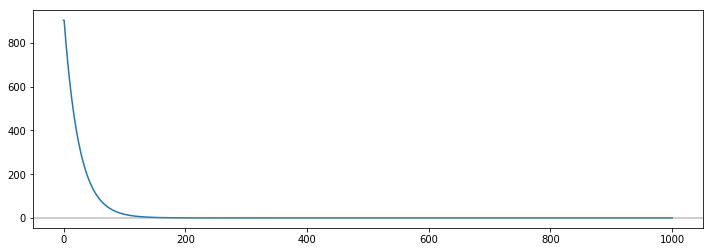

In [21]:
res_df = DataFrame.from_dict(results)
plt.plot(res_df.loss)
plt.axhline(y=0, c='grey', alpha=0.5)
plt.show()

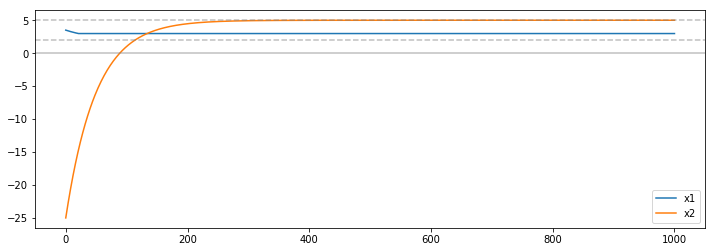

In [22]:
res_df.plot()
plt.axhline(y=2, c='grey', ls='dashed', alpha=0.5)
plt.axhline(y=5, c='grey', ls='dashed', alpha=0.5)
plt.axhline(y=0, c='grey', alpha=0.5)
plt.show()

## Exponential Smoothing Optimization

We compare an arithmetic moving average with an exponential smoothing of the same series, defined as:

$$ \text{Moving average} = MAV_t(n) = \frac{1}{\min(n, t)} \sum_{i=1}^{\min(n, t)} x_{t + 1 - i} $$ 

$$ \text{Exponential smoothing} = ES_t(a) = a\cdot x_t + (1 - a)\cdot ES_{t - 1}, \quad ES_1(a) = x_1. $$

The excersice consists of finding the value of $a$ for which we minimize the mean squared error (MSE) between $MAV(n)$ and $ES(a)$ for a given $n$.

The teoretical value is:

$$ a^{*} = \frac{2}{n + 1} $$

In [4]:
N = 1000
n = 100
a = 0.1
x = np.cumsum(np.random.randn(N))

In [5]:
def moving_average(x, n):
    mav = x.copy()
    for i in range(1, len(mav)):
        mav[i] = np.mean(x[:i][-n:])
    return(mav)


def exponential_smoothing(x, a):
    esm = x.copy()
    for i in range(1, len(esm)):
        esm[i] = a * x[i] + (1 - a) * esm[i - 1]
    return(esm)

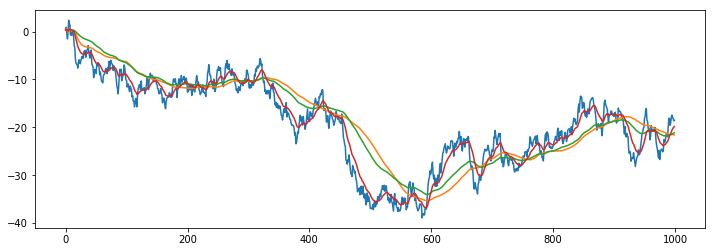

In [6]:
plt.plot(x)
plt.plot(moving_average(x, n))
plt.plot(exponential_smoothing(x, 2 / (n + 1)))
plt.plot(exponential_smoothing(x, a))
plt.show()

In [7]:
mav = moving_average(x, n)
mav_t = torch.tensor(mav)
a_t = torch.tensor(a, dtype=torch.float64, requires_grad=True)
x_t = torch.tensor(x)
print(a_t)
# print(x_t)
# print(mav_t)

tensor(0.1000, dtype=torch.float64)


In [8]:
esa = np.zeros_like(x)
# print(esa)

In [9]:
esa_t = x_t[0]
esa[0] = esa_t.detach().numpy()
loss = torch.zeros_like(esa_t)
print(esa_t)
# print(esa)
# print(loss)

tensor(0.3502, dtype=torch.float64)


In [10]:
esa_t = a_t * x_t[1] + (1 - a_t) * esa_t
esa[1] = esa_t.detach().numpy()
loss = loss.add((esa_t - mav_t[1]).pow(2))
print(esa_t)
# print(esa)
print(loss)

tensor(0.4038, dtype=torch.float64)
tensor(1.00000e-03 *
       2.8629, dtype=torch.float64)


In [11]:
loss.backward()

### Gradient Descent with `torch.optim` 

See [`torch.optim`](https://pytorch.org/docs/stable/optim.html?highlight=zero_grad)

In [12]:
lr = 1e-2
steps = 50

n = np.random.randint(10, N//10)
a = np.random.rand(1)
mav = moving_average(x, n)
mav_t = torch.tensor(mav)
a_t = torch.tensor(a, dtype=torch.float64, requires_grad=True)
x_t = torch.tensor(x)

A = np.zeros(steps)
Losses = np.zeros(steps)

optimizer = torch.optim.Adam([a_t], lr=lr)
for i in range(steps):
    
    optimizer.zero_grad()
    A[i] = a_t.detach().numpy()
    
    # Forward...
    esa = np.zeros_like(x)
    esa_t = x_t[0]
    
    esa[0] = esa_t.detach().numpy()
    loss = torch.zeros_like(esa_t)
    for j in range(1, len(x_t)):
        esa_t = a_t * x_t[j] + (1 - a_t) * esa_t
        esa[j] = esa_t.detach().numpy()
        loss = loss.add((esa_t - mav_t[j]).pow(2))
    
    Losses[i] = loss.detach().numpy()
    
    # Backwards
    loss.backward()
    optimizer.step()
   


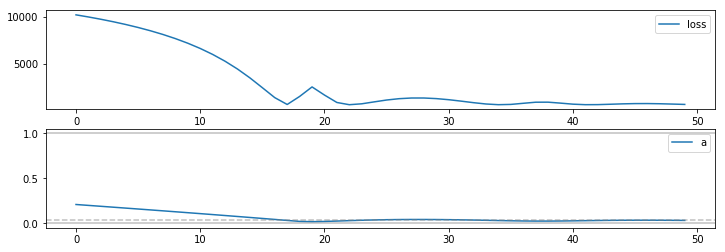

In [13]:
plt.subplot(2, 1, 1)
plt.plot(Losses, label='loss'); plt.legend()
plt.subplot(2, 1, 2)
plt.plot(A, label='a'); plt.legend()
plt.axhline(y = 2 / (n + 1), c='grey', alpha=0.5, ls='dashed')
plt.axhline(y = 0, c='grey', alpha=0.5)
plt.axhline(y = 1, c='grey', alpha=0.5)
plt.show()

In [14]:
print('a*:', a_t.item())
print('n*:', 2 / a_t.item() - 1)
print('n:', n)
print('')
print('Theoretical MSE:', np.mean((x - exponential_smoothing(x, a_t.item()))**2))
print('Gradient Descent MSE:', np.mean((x - exponential_smoothing(x, a_t.item()))**2))

a*: 0.030939759394633577
n*: 63.64174379930358
n: 60

Theoretical MSE: 11.484837554425507
Gradient Descent MSE: 11.484837554425507


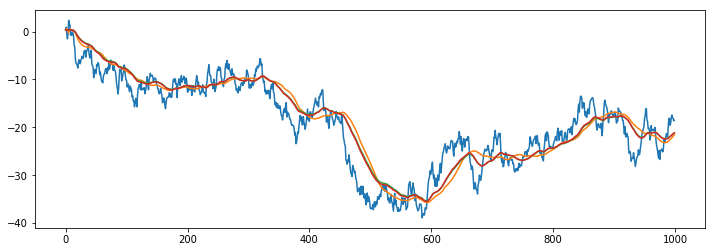

In [15]:
plt.plot(x)
plt.plot(moving_average(x, n), label='moving average')
plt.plot(exponential_smoothing(x, a_t.item()), label='GD exp. smoothing')
plt.plot(exponential_smoothing(x, 2 / (n + 1)), label='Theoretical exp. smoothing')
plt.show()